# Remapping analysis

In [1]:
import os
import sys
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiment import Experiment
from analysis import *
from utils import print_stats
from itertools import product
from scipy.stats import pearsonr
from tqdm import tqdm
from gc import collect


data_path = "../data"
save_path = "../figs"

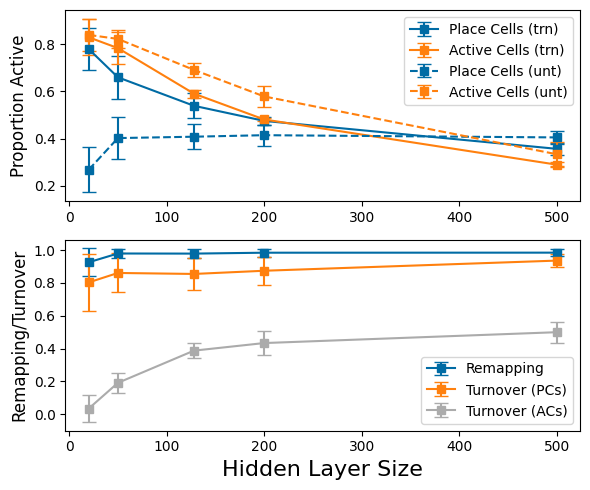

In [2]:
hiddens = [f'hidden{n}' for n in [20, 50, 200, 500]]
hiddens.insert(2, 'baseline')

ma = MultiAnalysis(data_path, hiddens)
xticks = [20, 50, 128, 200, 500]
xlabel = 'Hidden Layer Size'


ma.plot_lines(xticks, xlabel, linear=True, filename="../figs/remap_hs.png")

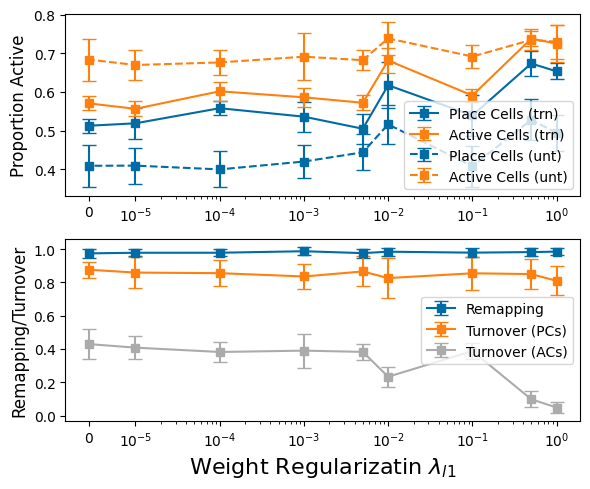

In [3]:
l1s = [f'l1_{n}' for n in ['1', '05', '01', '001', '0001', '00001', '000001', '0']]
l1s.insert(2, 'baseline')

ma = MultiAnalysis(data_path, l1s)
xticks = [1, 0.5, 0.1, 0.01, 0.005, 0.001, 0.0001, 0.00001, 0]
xlabel = 'Weight Regularizatin $\\lambda_{l1}$'


ma.plot_lines(xticks, xlabel, linthresh=1e-5, filename="../figs/remap_l1.png")

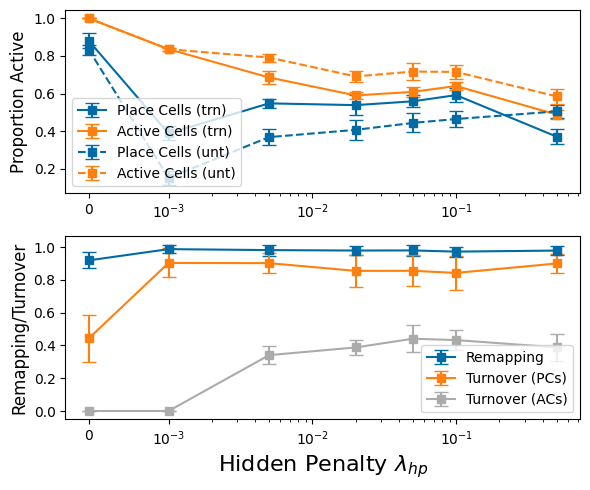

In [4]:
hps = [f'hp_{n}' for n in ['05', '01', '005', '0005', '0001', '0']]
hps.insert(3, 'baseline')

ma = MultiAnalysis(data_path, hps)
xticks = [0.5, 0.1, 0.05, 0.02, 0.005, 0.001, 0]
xlabel = 'Hidden Penalty $\\lambda_{hp}$'


ma.plot_lines(xticks, xlabel, filename="../figs/remap_hp.png")

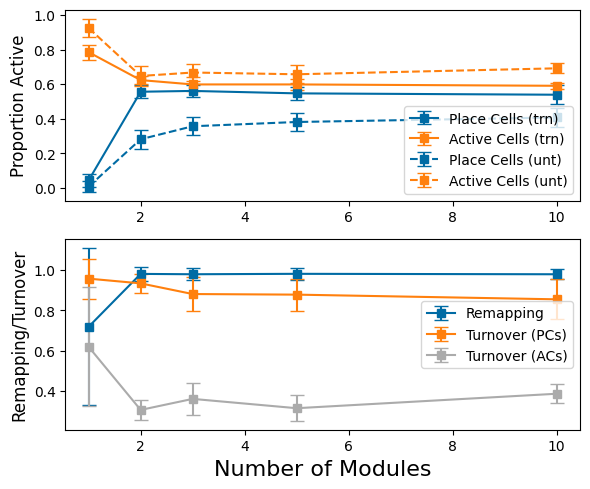

In [5]:
modules = ['1modules1024cells_homo', '2modules484cells', '3modules324cells', '5modules196cells', 'baseline']

ma = MultiAnalysis(data_path, modules)
xticks = [1, 2, 3, 5, 10]
xlabel = 'Number of Modules'


ma.plot_lines(xticks, xlabel, linear=True, filename="../figs/remap_modules.png")

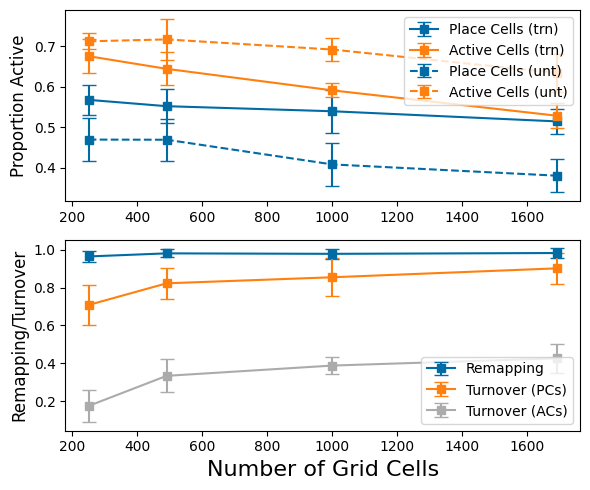

In [6]:
cells = ['25cells', '49cells', 'baseline', '169cells']

ma = MultiAnalysis(data_path, cells)
xticks = np.asarray([25, 49, 100, 169]) * 10
xlabel = 'Number of Grid Cells'


ma.plot_lines(xticks, xlabel, linear=True, filename="../figs/remap_cells.png")